### importing packages and functions:
All functions are contained in function.py

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic
%matplotlib inline

import functions

This notebook aims to calculate the distance between different raingauges. Note this was the first attempt at using geospatial data, later on geopandas was used rather than own code to export data. Data obatined from: <br>
<br>
Met Office (2021): MIDAS Open: UK daily rainfall data, v202107. NERC EDS Centre for Environmental Data Analysis, 08 September 2021. doi:10.5285/d6bcf4171c2f4754a7455d00deda0f72. http://dx.doi.org/10.5285/d6bcf4171c2f4754a7455d00deda0f72
<br>
<br>
Specifically the station meta data was used

## Importing Data

1850 there were only 2 stations:

In [2]:
data1850 = pd.read_csv("Data/midas_raindrnl_185301-185312.txt",sep=',')

In [3]:
data1850.ID.nunique()

2

Whilst 2021 there were 2348

In [4]:
data2021 = pd.read_csv("Data/midas_raindrnl_202101-202112.txt",sep=',')

C:\Users\david\AppData\Local\Temp\ipykernel_10624\1821358648.py:1: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data2021 = pd.read_csv("Data/midas_raindrnl_202101-202112.txt",sep=',')


In [5]:
data2021.OB_DAY_CNT.nunique()

2348

Note afterwards: of these 2348, only 348 had data in 2020, so these were only considered (see code at bottomn)

In [6]:
data_stations_hourly = pd.read_csv("Data/midas-open_uk-hourly-rain-obs_dv-202107_station-metadata.csv",
                                    sep=",",index_col=0,skipfooter=1)
data_stations_hourly.head(3)

C:\Users\david\AppData\Local\Temp\ipykernel_10624\595143646.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data_stations_hourly = pd.read_csv("Data/midas-open_uk-hourly-rain-obs_dv-202107_station-metadata.csv",


,station_name,station_file_name,historic_county,station_latitude,station_longitude,station_elevation,first_year,last_year
src_id,,,,,,,,
1,FOULA,foula,shetland,60.154,-2.074,22,1989,1995
3,FAIR ISLE,fair-isle,shetland,59.526,-1.630,57,1974,2020
4,SUMBURGH,sumburgh,shetland,59.879,-1.299,7,1978,1996


## Filtering for subsection to reduce compute times
First look at a smaller subsection of data

In [7]:
data_cumbria = data_stations_hourly.query("historic_county == 'cumbria'")
data_cumbria.head(3)

,station_name,station_file_name,historic_county,station_latitude,station_longitude,station_elevation,first_year,last_year
src_id,,,,,,,,
1054,ESKMEALS,eskmeals,cumbria,54.325,-3.408,8,1994,2001
1055,ST BEES HEAD NO 2,st-bees-head-no-2,cumbria,54.518,-3.615,124,1992,2020
1060,KESWICK,keswick,cumbria,54.614,-3.157,81,1992,2020


### Plot showing the location of points
This gives a quick representation, however is better done in GIS

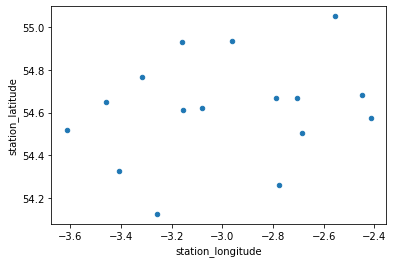

In [8]:
data_cumbria.plot("station_longitude","station_latitude","scatter");

### Package used to caculate distance between two points
Geopy is used to caculate the geodesic distance between the differen points, here an example is given

In [9]:
# from geopy.distance import geodesic
p1 = 54.325,-3.408
p2 = 54.518,-3.615
print(geodesic(p1,p2).km)

25.339274867466546


This can be summarised into the distance_too_close function which takes a dataframe and a threshold and returns any stations closer than the threshold. <br>
Here all the hourly stations are used as input any any closer than 5km are returned.<br>
_Warning the cell bellow can take a minute or two_

In [10]:
closeby_stations = functions.distance_too_close(data_stations_hourly, 5)
closeby_stations

[((-4.167, 57.687), (-4.158, 57.703), 2.036227344130836),
 ((-3.398, 57.006), (-3.397, 57.011), 0.5665222605012272),
 ((-2.215, 57.187), (-2.205, 57.205), 2.287310726468455),
 ((-3.348, 55.951), (-3.344, 55.928), 2.5940010236955477),
 ((-0.544, 51.724), (-0.534, 51.69), 3.9429171332726454),
 ((0.807, 51.537), (0.827, 51.555), 2.9841070147944846),
 ((-1.665, 53.613), (-1.668, 53.612), 0.3498907285153821),
 ((-1.924, 52.454), (-1.928, 52.456), 0.4951198505986686),
 ((-2.218, 51.858), (-2.196, 51.891), 4.403739872693748),
 ((-0.131, 51.505), (-0.112, 51.522), 2.827562342527144),
 ((-0.004, 51.48), (-0.003, 51.478), 0.24858557160681416),
 ((-0.316, 51.468), (-0.294, 51.482), 2.8890277212214066),
 ((-0.193, 51.152), (-0.229, 51.144), 4.0790744548487465),
 ((0.636, 51.197), (0.63, 51.185), 1.4914412683096763),
 ((1.335, 51.347), (1.348, 51.352), 1.5414156205173541),
 ((0.336, 50.865), (0.317, 50.891), 3.5763909555001963),
 ((-1.405, 50.905), (-1.404, 50.901), 0.4586730452574347),
 ((-4.908, 

To import this data into QGIS and process it into a map, it can be saved:

In [11]:
functions.tuple_to_csv(closeby_stations,"Stations with closest closer than 5km")

## Plot:
or, the data returned can then be here:

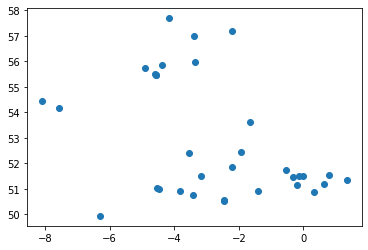

In [12]:
lst_x = []
lst_y = []
for i in closeby_stations:
    lst_x.append(i[0][0])
    lst_y.append(i[0][1])
plt.plot(lst_x,lst_y,"o");

### Now lets consider the closest other station per station

The same can be done as before computing the distance to all other points, however we consider the upperbound stations.<br>
The closest station is found, if it is further than the threshold it is returned

In [13]:
far_stations = functions.distance_closest(data_stations_hourly, 40)
far_stations

[((-2.074, 60.154), (-1.63, 59.526), 85.3960830397832),
 ((-1.63, 59.526), (-1.299, 59.879), 53.69111734993704),
 ((-0.856, 60.748), (-1.278, 60.447), 57.44326074847978),
 ((-4.405, 59.082), (-4.763, 58.568), 69.42882212396513),
 ((-2.901, 58.953), (-3.09, 58.454), 59.27923333184718),
 ((-3.922, 58.23), (-3.967, 57.819), 45.91509118666522),
 ((-5.633, 57.859), (-5.306, 57.613), 45.28543223191706),
 ((-6.319, 58.213), (-6.897, 57.78), 79.86618321343873),
 ((-6.769, 57.436), (-6.897, 57.78), 40.57315127631493),
 ((-2.949, 57.553), (-3.323, 57.711), 44.930552442516344),
 ((-5.697, 55.441), (-6.154, 55.181), 58.16272651769959),
 ((-5.44, 56.45), (-4.985, 56.028), 68.70489895565755),
 ((-4.418, 54.703), (-4.008, 54.803), 46.6774215297198),
 ((-2.643, 51.006), (-2.6, 51.453), 49.93497474164129),
 ((-6.881, 56.5), (-7.449, 57.025), 85.49028902126)]

In [14]:
functions.tuple_to_csv(far_stations,"Stations with closestfurther than 40 km")

# Repeating for 2020 data

After some further investigation i found that when considering the "last_year", some gauges had been replaced or in use and therefore are no longer useful to consider. 

In [15]:
data_stations_daily = pd.read_csv("Data/midas-open_uk-daily-rain-obs_dv-202107_station-metadata.csv",
                                  sep=",",index_col=0,skipfooter=1)
data_stations_daily.head(3)

C:\Users\david\AppData\Local\Temp\ipykernel_10624\3680133333.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data_stations_daily = pd.read_csv("Data/midas-open_uk-daily-rain-obs_dv-202107_station-metadata.csv",


,station_name,station_file_name,historic_county,station_latitude,station_longitude,station_elevation,first_year,last_year
src_id,,,,,,,,
1,FOULA,foula,shetland,60.154,-2.074,22,1989,2003
3,FAIR ISLE,fair-isle,shetland,59.526,-1.630,57,1974,1997
5,HAMNAVOE,hamnavoe,shetland,60.104,-1.333,21,1961,1973


In [23]:
all_stations = data_stations_daily.append(data_stations_hourly)
current_stations = all_stations.query("last_year == 2020")
current_stations.head(3)

C:\Users\david\AppData\Local\Temp\ipykernel_10624\4053295565.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_stations = data_stations_daily.append(data_stations_hourly)


,station_name,station_file_name,historic_county,station_latitude,station_longitude,station_elevation,first_year,last_year,Location
src_id,,,,,,,,,
38,ACHFARY,achfary,sutherland,58.311,-4.916,46,1967,2020,NaN
8231,HUNTSHAM,huntsham,devon,50.953,-3.438,237,2006,2020,NaN
50,STRATHY EAST,strathy-east,sutherland,58.561,-3.992,68,1993,2020,NaN


In [17]:
current_far_stations = functions.distance_closest(current_stations, 40)
current_far_stations

C:\Users\david\Documents\@@ Python\Jaar 4\Q3\Distance Stations\functions.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df[['station_longitude', 'station_latitude']].apply(tuple, axis=1)


[((-3.77, 56.718), (-3.729, 56.326), 43.779841256116256),
 ((-2.906, 55.541), (-3.207, 55.312), 41.90257176546626),
 ((-3.229, 59.112), (-2.901, 58.953), 40.346772800244565),
 ((-5.428, 56.034), (-5.44, 56.45), 46.1212707167864),
 ((-2.185, 50.951), (-1.836, 50.779), 43.074517446098135),
 ((-3.589, 55.047), (-3.95, 54.926), 42.12104580267972),
 ((-1.63, 59.526), (-1.185, 60.139), 84.11267656407918),
 ((-1.185, 60.139), (-0.856, 60.748), 76.92816782826834),
 ((-3.09, 58.454), (-2.901, 58.953), 59.27923333184718),
 ((-6.319, 58.213), (-6.897, 57.78), 79.86618321343873),
 ((-4.708, 56.867), (-4.661, 56.419), 49.97662995499321),
 ((-4.238, 56.94), (-4.486, 57.328), 51.05780295363842),
 ((-4.661, 56.419), (-4.567, 56.048), 42.45863754350291),
 ((1.335, 51.347), (0.878, 51.297), 50.838132648755746),
 ((-5.697, 55.441), (-6.154, 55.181), 58.16272651769959),
 ((-3.258, 54.125), (-2.86, 54.076), 44.3456132402807),
 ((-4.741, 52.789), (-4.536, 53.253), 56.25400387288528),
 ((-4.149, 51.089), (-3

In [18]:
functions.tuple_to_csv(current_far_stations,"Current stations with closest being further than 40km")

In [19]:
current_closeby_stations = functions.distance_too_close(current_stations, 5)
current_closeby_stations

C:\Users\david\Documents\@@ Python\Jaar 4\Q3\Distance Stations\functions.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df[['station_longitude', 'station_latitude']].apply(tuple, axis=1)


[((-1.113, 51.603), (-1.099, 51.62), 2.4446710109857954),
 ((-1.213, 50.593), (-1.181, 50.624), 4.942043883903684),
 ((-4.893, 55.723), (-4.908, 55.749), 3.326813847649841),
 ((-3.47, 52.749), (-3.465, 52.757), 1.0468510943301985),
 ((-5.941, 54.56), (-5.91, 54.584), 4.3375784371054085),
 ((-5.91, 54.584), (-5.871, 54.565), 4.798689133991773),
 ((-2.215, 57.187), (-2.205, 57.205), 2.287310726468455),
 ((-4.565, 55.477), (-4.585, 55.515), 4.761543104928747)]

In [20]:
functions.tuple_to_csv(current_closeby_stations,"Current stations with closest less than 5km")

In [21]:
current_closeby_stations

[((-1.113, 51.603), (-1.099, 51.62), 2.4446710109857954),
 ((-1.213, 50.593), (-1.181, 50.624), 4.942043883903684),
 ((-4.893, 55.723), (-4.908, 55.749), 3.326813847649841),
 ((-3.47, 52.749), (-3.465, 52.757), 1.0468510943301985),
 ((-5.941, 54.56), (-5.91, 54.584), 4.3375784371054085),
 ((-5.91, 54.584), (-5.871, 54.565), 4.798689133991773),
 ((-2.215, 57.187), (-2.205, 57.205), 2.287310726468455),
 ((-4.565, 55.477), (-4.585, 55.515), 4.761543104928747)]

In [22]:
current_far_stations

[((-3.77, 56.718), (-3.729, 56.326), 43.779841256116256),
 ((-2.906, 55.541), (-3.207, 55.312), 41.90257176546626),
 ((-3.229, 59.112), (-2.901, 58.953), 40.346772800244565),
 ((-5.428, 56.034), (-5.44, 56.45), 46.1212707167864),
 ((-2.185, 50.951), (-1.836, 50.779), 43.074517446098135),
 ((-3.589, 55.047), (-3.95, 54.926), 42.12104580267972),
 ((-1.63, 59.526), (-1.185, 60.139), 84.11267656407918),
 ((-1.185, 60.139), (-0.856, 60.748), 76.92816782826834),
 ((-3.09, 58.454), (-2.901, 58.953), 59.27923333184718),
 ((-6.319, 58.213), (-6.897, 57.78), 79.86618321343873),
 ((-4.708, 56.867), (-4.661, 56.419), 49.97662995499321),
 ((-4.238, 56.94), (-4.486, 57.328), 51.05780295363842),
 ((-4.661, 56.419), (-4.567, 56.048), 42.45863754350291),
 ((1.335, 51.347), (0.878, 51.297), 50.838132648755746),
 ((-5.697, 55.441), (-6.154, 55.181), 58.16272651769959),
 ((-3.258, 54.125), (-2.86, 54.076), 44.3456132402807),
 ((-4.741, 52.789), (-4.536, 53.253), 56.25400387288528),
 ((-4.149, 51.089), (-3